In [31]:
import torch
from layers import Linear, Relu, Tanh, Leaky_Relu, Elu, Sigmoid
from loss_func import MSELoss, BCELoss
from optimizers import SGD, AdaGrad, Adam, MomentumSGD
from Sequential import Sequential
from matplotlib import pyplot as plt
from helpers import normalize, plotLossAcc, generate_disc_set, train, cross_validation, one_hot_encoding, train_cv

In [105]:
# initial setups
torch.manual_seed(0)
nb_epochs = 50
batch_size = 50

# Generate training and test data sets and normalize
train_input, train_label= generate_disc_set(1000)
test_input, test_label = generate_disc_set(1000)
train_target = one_hot_encoding(train_label)
test_target = one_hot_encoding(test_label)
train_input = normalize(train_input)
test_input = normalize(test_input)

# K-fold cross validation to optimize learning rate over range lr_set
k_fold = 5

In [106]:
optimizer_name = SGD
loss = MSELoss()

In [96]:
lr_set = torch.logspace(-1, -0, 5)
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


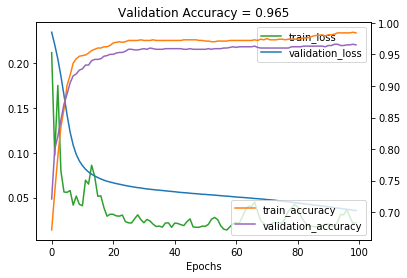

In [97]:
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_relu, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_relu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [138]:
lr_set = torch.logspace(-3, 0, 5)
model= Sequential(Linear(2,25), Elu(), Linear(25,25), Elu(),Linear(25,25), Elu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
1.0


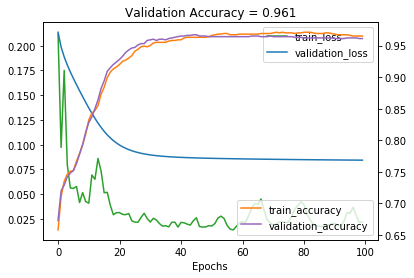

In [109]:
model.reset()
nb_epochs = 100
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_elu, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_elu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [110]:
lr_set = torch.logspace(-1, 0, 5)
model= Sequential(Linear(2,25), Leaky_Relu(), Linear(25,25), Leaky_Relu(),Linear(25,25), Leaky_Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


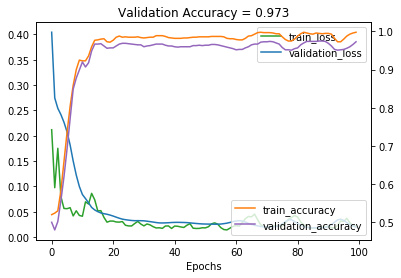

In [87]:
model.reset()
nb_epochs = 100
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_leaky, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_leaky, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [114]:
lr_set = torch.logspace(-2, 1, 5)
model= Sequential(Linear(2,25), Tanh(), Linear(25,25), Tanh(),Linear(25,25), Tanh(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.3162277638912201


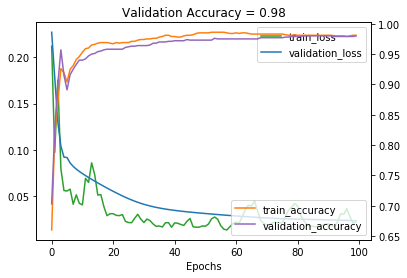

In [115]:
model.reset()
nb_epochs = 100
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_tanh, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_tanh, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [128]:
lr_set = torch.logspace(-2, 0, 5)
model= Sequential(Linear(2,25), Sigmoid(), Linear(25,25), Sigmoid(),Linear(25,25), Sigmoid(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.009999999776482582


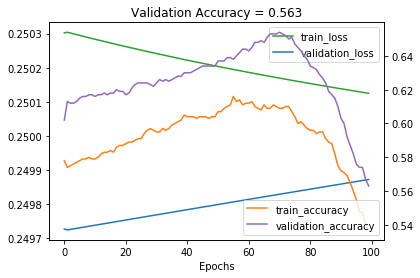

In [137]:
model.reset()
nb_epochs = 100
# set up optimizers
optimizer = optimizer_name(model, lr = 0.05)
# model training
loss_train_sig, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_sig, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [119]:
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)

    ax1.legend(["relu", "leaky relu", "elu", "tanh"])

    ax1.set_title("loss comparison")

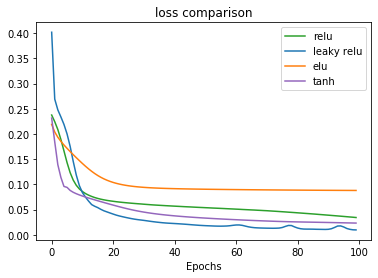

In [120]:
loss = [loss_train_relu, loss_train_leaky, loss_train_elu, loss_train_tanh, ]
plotLoss(loss,  torch.arange(nb_epochs), "Epochs")

In [148]:
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
loss = MSELoss()

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.0010000000474974513


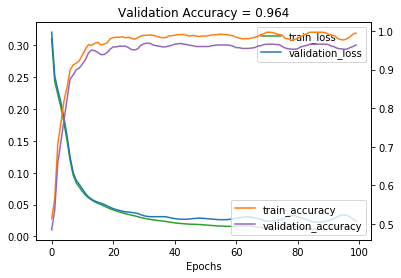

In [149]:
lr_set = torch.logspace(-5, -3, 5)
optimizer_name = Adam
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adam, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adam, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.009999999776482582


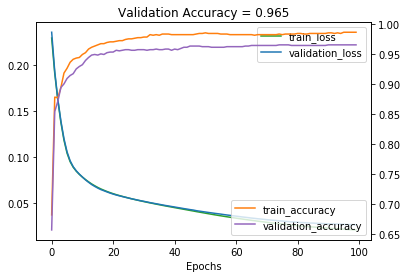

In [142]:
lr_set = torch.logspace(-3, -2, 5)
optimizer_name = MomentumSGD
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_moment, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_moment, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.009999999776482582


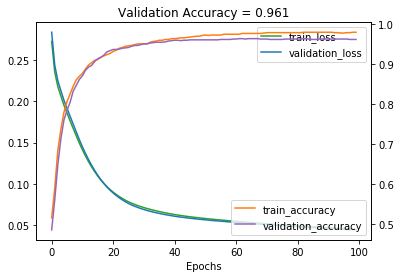

In [143]:
lr_set = torch.logspace(-3, -2, 5)
optimizer_name = AdaGrad
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adagrad, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adagrad, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

In [144]:
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)

    ax1.legend(["SGD", "moment", "adagrad", "adam"])
    ax1.set_title("loss comparison")

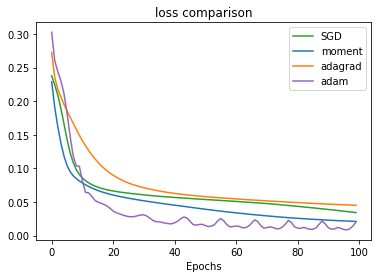

In [146]:
loss = [loss_train_relu, loss_train_moment, loss_train_adagrad, loss_train_adam]
plotLoss(loss,  torch.arange(nb_epochs), "Epochs")